In [1]:
from typing import Optional, List, Dict, Union

import numpy as np
import pandas as pd

from IPython.display import display, HTML

from matplotlib import pyplot as plt

from tqdm.notebook import tqdm_notebook as tqdm

from notebook_utils.constants import PROJ_ROOT, NEW_GENRES, GENRE_COMBS, scale
from notebook_utils.predictions import Predictor
from notebook_utils.utils import display_df, setup_axis, process_and_scale, create_cmap
from notebook_utils.models import ModelLoader

tqdm.pandas()

p = Predictor(ngrams=True, general=True, lexical=True)

c:\python37\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
c:\python37\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
c:\python37\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


# Show Loaded Data

In [2]:
p.loader.show_model_df("Unigram")

Book #,@Genre,first_1k,@Outcome
10368,Adventure_Stories,i was on a french steamer bound from havre to new york when i had a peculiar experience in the way o...,FAILURE
12190,Adventure_Stories,an introductory disaster early in the spring of the year 1884 the threemasted schooner castor from s...,FAILURE
13290,Adventure_Stories,editors note martin rattler was one of robert michael ballantynes early books born at edinburgh in 1...,FAILURE
...,...,...,...
29948,Short_Stories,experiment the first time machine gentlemen professor johnson proudly informed his two colleagues tr...,SUCCESSFUL
3815,Short_Stories,o henry afritechef of all delight of all delectables conglomerate that stay the starved brain and re...,SUCCESSFUL
8129,Short_Stories,preface poltarnees beholder of ocean blagdaross the madness of andelsprutz where the tides ebb and f...,SUCCESSFUL


In [3]:
p.loader.show_model_df("Bigram")

Book #,@Genre,first_1k,@Outcome
10368,Adventure_Stories,i was on a french steamer bound from havre to new york when i had a peculiar experience in the way o...,FAILURE
12190,Adventure_Stories,an introductory disaster early in the spring of the year 1884 the threemasted schooner castor from s...,FAILURE
13290,Adventure_Stories,editors note martin rattler was one of robert michael ballantynes early books born at edinburgh in 1...,FAILURE
...,...,...,...
29948,Short_Stories,experiment the first time machine gentlemen professor johnson proudly informed his two colleagues tr...,SUCCESSFUL
3815,Short_Stories,o henry afritechef of all delight of all delectables conglomerate that stay the starved brain and re...,SUCCESSFUL
8129,Short_Stories,preface poltarnees beholder of ocean blagdaross the madness of andelsprutz where the tides ebb and f...,SUCCESSFUL


In [4]:
p.loader.show_model_df("Roget")

Book #,@Genre,vehicle,ship,circumscription,...,numbness,analogy,zoology,inodorousness,@Outcome
10368,Adventure_Stories,0.351899,0.079800,0.346154,...,0.0,0.000000,0.0,0.0,FAILURE
12190,Adventure_Stories,0.541772,0.172070,0.076923,...,0.0,0.000000,0.0,0.0,FAILURE
13290,Adventure_Stories,0.524051,0.229426,0.153846,...,0.0,0.000000,0.0,0.0,FAILURE
15072,Adventure_Stories,0.521519,0.127182,0.000000,...,0.0,0.000000,0.0,0.0,FAILURE
18399,Adventure_Stories,0.334177,0.291771,0.076923,...,0.0,0.000000,0.0,0.0,FAILURE
...,...,...,...,...,...,...,...,...,...,...
27462,Short_Stories,0.098734,0.077307,0.038462,...,0.0,0.000000,0.0,0.0,SUCCESSFUL
2777,Short_Stories,0.415190,0.201995,0.230769,...,0.0,0.037037,0.0,0.0,SUCCESSFUL
29948,Short_Stories,0.025316,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,SUCCESSFUL
3815,Short_Stories,0.470886,0.072319,0.192308,...,0.0,0.000000,0.0,0.0,SUCCESSFUL


In [5]:
p.loader.show_model_df("WordNet")

Book #,@Genre,be,exist,equal,...,agua,ditch_reed,tax-exempt,marmorean,@Outcome
10368,Adventure_Stories,0.52065,0.540626,0.516462,...,0.0,0.0,0.0,0.0,FAILURE
12190,Adventure_Stories,0.38635,0.385256,0.382785,...,0.0,0.0,0.0,0.0,FAILURE
13290,Adventure_Stories,0.33830,0.340071,0.336771,...,0.0,0.0,0.0,0.0,FAILURE
15072,Adventure_Stories,0.25300,0.251685,0.250298,...,0.0,0.0,0.0,0.0,FAILURE
18399,Adventure_Stories,0.29720,0.296869,0.295518,...,0.0,0.0,0.0,0.0,FAILURE
...,...,...,...,...,...,...,...,...,...,...
27462,Short_Stories,0.11935,0.124455,0.119000,...,0.0,0.0,0.0,0.0,SUCCESSFUL
2777,Short_Stories,0.23260,0.234641,0.232051,...,0.0,0.0,0.0,0.0,SUCCESSFUL
29948,Short_Stories,0.00525,0.005549,0.005157,...,0.0,0.0,0.0,0.0,SUCCESSFUL
3815,Short_Stories,0.21695,0.219580,0.214994,...,1.0,1.0,0.0,0.0,SUCCESSFUL


In [6]:
p.loader.show_model_df("LIWC")

Book #,@Genre,future,i,past,...,relig,family,money,death,@Outcome
10368,Adventure_Stories,0.488625,0.526667,0.634418,...,0.178451,0.358586,0.306452,0.156522,FAILURE
12190,Adventure_Stories,0.323552,0.055385,0.384217,...,0.106061,0.053030,0.062500,0.108696,FAILURE
13290,Adventure_Stories,0.270295,0.071026,0.294950,...,0.163300,0.108586,0.237903,0.130435,FAILURE
15072,Adventure_Stories,0.282963,0.080513,0.318877,...,0.079125,0.351010,0.141129,0.047826,FAILURE
18399,Adventure_Stories,0.277404,0.102564,0.292189,...,0.521886,0.462121,0.278226,0.171739,FAILURE
...,...,...,...,...,...,...,...,...,...,...
27462,Short_Stories,0.065021,0.014359,0.082480,...,0.016835,0.002525,0.028226,0.036957,SUCCESSFUL
2777,Short_Stories,0.197906,0.052308,0.230990,...,0.069024,0.042929,0.252016,0.067391,SUCCESSFUL
29948,Short_Stories,0.005041,0.002308,0.005637,...,0.001684,0.000000,0.000000,0.004348,SUCCESSFUL
3815,Short_Stories,0.232291,0.155641,0.260209,...,0.072391,0.146465,0.328629,0.080435,SUCCESSFUL


In [7]:
p.loader.show_model_df("NRC")

Book #,@Genre,anger,anticipation,disgust,...,positive,sadness,surprise,trust,@Outcome
10368,Adventure_Stories,0.250807,0.155172,0.241481,...,0.348408,0.342105,0.487805,0.391097,FAILURE
12190,Adventure_Stories,0.269107,0.089531,0.253333,...,0.245919,0.301754,0.341463,0.192899,FAILURE
13290,Adventure_Stories,0.503767,0.134192,0.474074,...,0.361520,0.469298,0.550933,0.445681,FAILURE
15072,Adventure_Stories,0.206674,0.102825,0.217778,...,0.244314,0.221930,0.327116,0.241123,FAILURE
18399,Adventure_Stories,0.392896,0.138139,0.465185,...,0.319508,0.354386,0.411765,0.414414,FAILURE
...,...,...,...,...,...,...,...,...,...,...
27462,Short_Stories,0.148547,0.023265,0.105185,...,0.067701,0.123684,0.077475,0.093800,SUCCESSFUL
2777,Short_Stories,0.240043,0.091192,0.219259,...,0.263580,0.250000,0.334290,0.321675,SUCCESSFUL
29948,Short_Stories,0.005382,0.000000,0.011852,...,0.000000,0.001754,0.000000,0.006889,SUCCESSFUL
3815,Short_Stories,0.376749,0.077482,0.349630,...,0.226385,0.252632,0.298422,0.291998,SUCCESSFUL


# Ensemble Word Models

In [8]:
ens_accs = []

### Unigram Roget

In [9]:
uni_roget_acc = p.ensemble(["Unigram", "Roget"], add_to_acc=ens_accs, disp_acc=True)

Model Name,Genre,Accuracy
Unigram_Roget,Adventure_Stories,0.730000
Unigram_Roget,Fiction,0.710000
Unigram_Roget,Historical_Fiction,0.620000
Unigram_Roget,Love_Stories,0.626316
Unigram_Roget,Mystery,0.700000
Unigram_Roget,Poetry,0.694737
Unigram_Roget,Science_Fiction,0.620000
Unigram_Roget,Short_Stories,0.690000
Unigram_Roget,Average,0.673882


### Unigram Roget WordNet

In [10]:
uni_roget_wn_ens_acc = p.ensemble(["Unigram", "Roget", "WordNet"], add_to_acc=ens_accs, disp_acc=True)

Model Name,Genre,Accuracy
Unigram_Roget_WordNet,Adventure_Stories,0.781579
Unigram_Roget_WordNet,Fiction,0.740000
Unigram_Roget_WordNet,Historical_Fiction,0.590000
Unigram_Roget_WordNet,Love_Stories,0.696842
Unigram_Roget_WordNet,Mystery,0.720000
Unigram_Roget_WordNet,Poetry,0.755789
Unigram_Roget_WordNet,Science_Fiction,0.640000
Unigram_Roget_WordNet,Short_Stories,0.770000
Unigram_Roget_WordNet,Average,0.711776


### Unigram Roget LIWC

In [11]:
uni_roget_liwc_ens_acc = p.ensemble(["Unigram", "Roget", "LIWC"], add_to_acc=ens_accs, disp_acc=True)

Model Name,Genre,Accuracy
Unigram_Roget_LIWC,Adventure_Stories,0.740000
Unigram_Roget_LIWC,Fiction,0.730000
Unigram_Roget_LIWC,Historical_Fiction,0.610000
Unigram_Roget_LIWC,Love_Stories,0.637368
Unigram_Roget_LIWC,Mystery,0.710000
Unigram_Roget_LIWC,Poetry,0.663684
Unigram_Roget_LIWC,Science_Fiction,0.640000
Unigram_Roget_LIWC,Short_Stories,0.720000
Unigram_Roget_LIWC,Average,0.681382


### Unigram Roget LIWC Sentiment

In [12]:
uni_roget_liwc_nrc_ens_acc = p.ensemble(["Unigram", "Roget", "LIWC", "NRC"], add_to_acc=ens_accs, disp_acc=True)

Model Name,Genre,Accuracy
Unigram_Roget_LIWC_NRC,Adventure_Stories,0.708947
Unigram_Roget_LIWC_NRC,Fiction,0.740000
Unigram_Roget_LIWC_NRC,Historical_Fiction,0.640000
Unigram_Roget_LIWC_NRC,Love_Stories,0.626316
Unigram_Roget_LIWC_NRC,Mystery,0.700000
Unigram_Roget_LIWC_NRC,Poetry,0.684211
Unigram_Roget_LIWC_NRC,Science_Fiction,0.630000
Unigram_Roget_LIWC_NRC,Short_Stories,0.720000
Unigram_Roget_LIWC_NRC,Average,0.681184


### Unigram POS

In [ ]:
uni_pos_acc = p.ensemble(["Unigram", "POS"], add_to_acc=ens_accs, disp_acc=True)

### Unigram POS Roget

In [13]:
uni_pos_roget_acc = p.ensemble(["Unigram", "POS", "Roget"], add_to_acc=ens_accs, disp_acc=True)

Model Name,Genre,Accuracy
Unigram_Roget_POS,Adventure_Stories,0.740526
Unigram_Roget_POS,Fiction,0.730000
Unigram_Roget_POS,Historical_Fiction,0.660000
Unigram_Roget_POS,Love_Stories,0.616842
Unigram_Roget_POS,Mystery,0.700000
Unigram_Roget_POS,Poetry,0.735263
Unigram_Roget_POS,Science_Fiction,0.650000
Unigram_Roget_POS,Short_Stories,0.720000
Unigram_Roget_POS,Average,0.694079


### Unigram POS Roget LIWC

In [14]:
uni_pos_roget_liwc_acc = p.ensemble(["Unigram", "POS", "Roget", "LIWC"], liwc=True, add_to_acc=ens_accs, disp_acc=True)

Model Name,Genre,Accuracy
Unigram_Roget_LIWC_POS,Adventure_Stories,0.719474
Unigram_Roget_LIWC_POS,Fiction,0.740000
Unigram_Roget_LIWC_POS,Historical_Fiction,0.620000
Unigram_Roget_LIWC_POS,Love_Stories,0.627368
Unigram_Roget_LIWC_POS,Mystery,0.690000
Unigram_Roget_LIWC_POS,Poetry,0.714211
Unigram_Roget_LIWC_POS,Science_Fiction,0.660000
Unigram_Roget_LIWC_POS,Short_Stories,0.700000
Unigram_Roget_LIWC_POS,Average,0.683882


### Unigram POS Roget LIWC Sentiment

In [15]:
uni_pos_roget_liwc_nrc_acc = p.ensemble(["Unigram", "POS", "Roget", "LIWC", "NRC"], add_to_acc=ens_accs, disp_acc=True)

Model Name,Genre,Accuracy
Unigram_Roget_LIWC_POS_NRC,Adventure_Stories,0.667368
Unigram_Roget_LIWC_POS_NRC,Fiction,0.690000
Unigram_Roget_LIWC_POS_NRC,Historical_Fiction,0.600000
Unigram_Roget_LIWC_POS_NRC,Love_Stories,0.626842
Unigram_Roget_LIWC_POS_NRC,Mystery,0.670000
Unigram_Roget_LIWC_POS_NRC,Poetry,0.621579
Unigram_Roget_LIWC_POS_NRC,Science_Fiction,0.530000
Unigram_Roget_LIWC_POS_NRC,Short_Stories,0.670000
Unigram_Roget_LIWC_POS_NRC,Average,0.634474


### Roget LIWC

In [16]:
roget_liwc_acc = p.ensemble(["Roget", "LIWC"], add_to_acc=ens_accs, disp_acc=True)

Model Name,Genre,Accuracy
Roget_LIWC,Adventure_Stories,0.678421
Roget_LIWC,Fiction,0.660000
Roget_LIWC,Historical_Fiction,0.610000
Roget_LIWC,Love_Stories,0.536842
Roget_LIWC,Mystery,0.650000
Roget_LIWC,Poetry,0.561053
Roget_LIWC,Science_Fiction,0.540000
Roget_LIWC,Short_Stories,0.690000
Roget_LIWC,Average,0.615789


### Roget Sentiment

In [17]:
roget_nrc_acc = p.ensemble(["Roget", "NRC"], add_to_acc=ens_accs, disp_acc=True)

Model Name,Genre,Accuracy
Roget_NRC,Adventure_Stories,0.699474
Roget_NRC,Fiction,0.640000
Roget_NRC,Historical_Fiction,0.580000
Roget_NRC,Love_Stories,0.616316
Roget_NRC,Mystery,0.630000
Roget_NRC,Poetry,0.631053
Roget_NRC,Science_Fiction,0.530000
Roget_NRC,Short_Stories,0.660000
Roget_NRC,Average,0.623355


### Roget LIWC Sentiment

In [18]:
roget_liwc_nrc_acc = p.ensemble(["Roget", "LIWC", "NRC"], add_to_acc=ens_accs, disp_acc=True)

Model Name,Genre,Accuracy
Roget_LIWC_NRC,Adventure_Stories,0.678421
Roget_LIWC_NRC,Fiction,0.660000
Roget_LIWC_NRC,Historical_Fiction,0.550000
Roget_LIWC_NRC,Love_Stories,0.606316
Roget_LIWC_NRC,Mystery,0.690000
Roget_LIWC_NRC,Poetry,0.570000
Roget_LIWC_NRC,Science_Fiction,0.440000
Roget_LIWC_NRC,Short_Stories,0.670000
Roget_LIWC_NRC,Average,0.608092


### LIWC Sentiment

In [19]:
liwc_nrc_acc = p.ensemble(["LIWC", "NRC"], add_to_acc=ens_accs, disp_acc=True)

Model Name,Genre,Accuracy
LIWC_NRC,Adventure_Stories,0.657368
LIWC_NRC,Fiction,0.620000
LIWC_NRC,Historical_Fiction,0.560000
LIWC_NRC,Love_Stories,0.565789
LIWC_NRC,Mystery,0.630000
LIWC_NRC,Poetry,0.538947
LIWC_NRC,Science_Fiction,0.430000
LIWC_NRC,Short_Stories,0.640000
LIWC_NRC,Average,0.580263


# Plotting

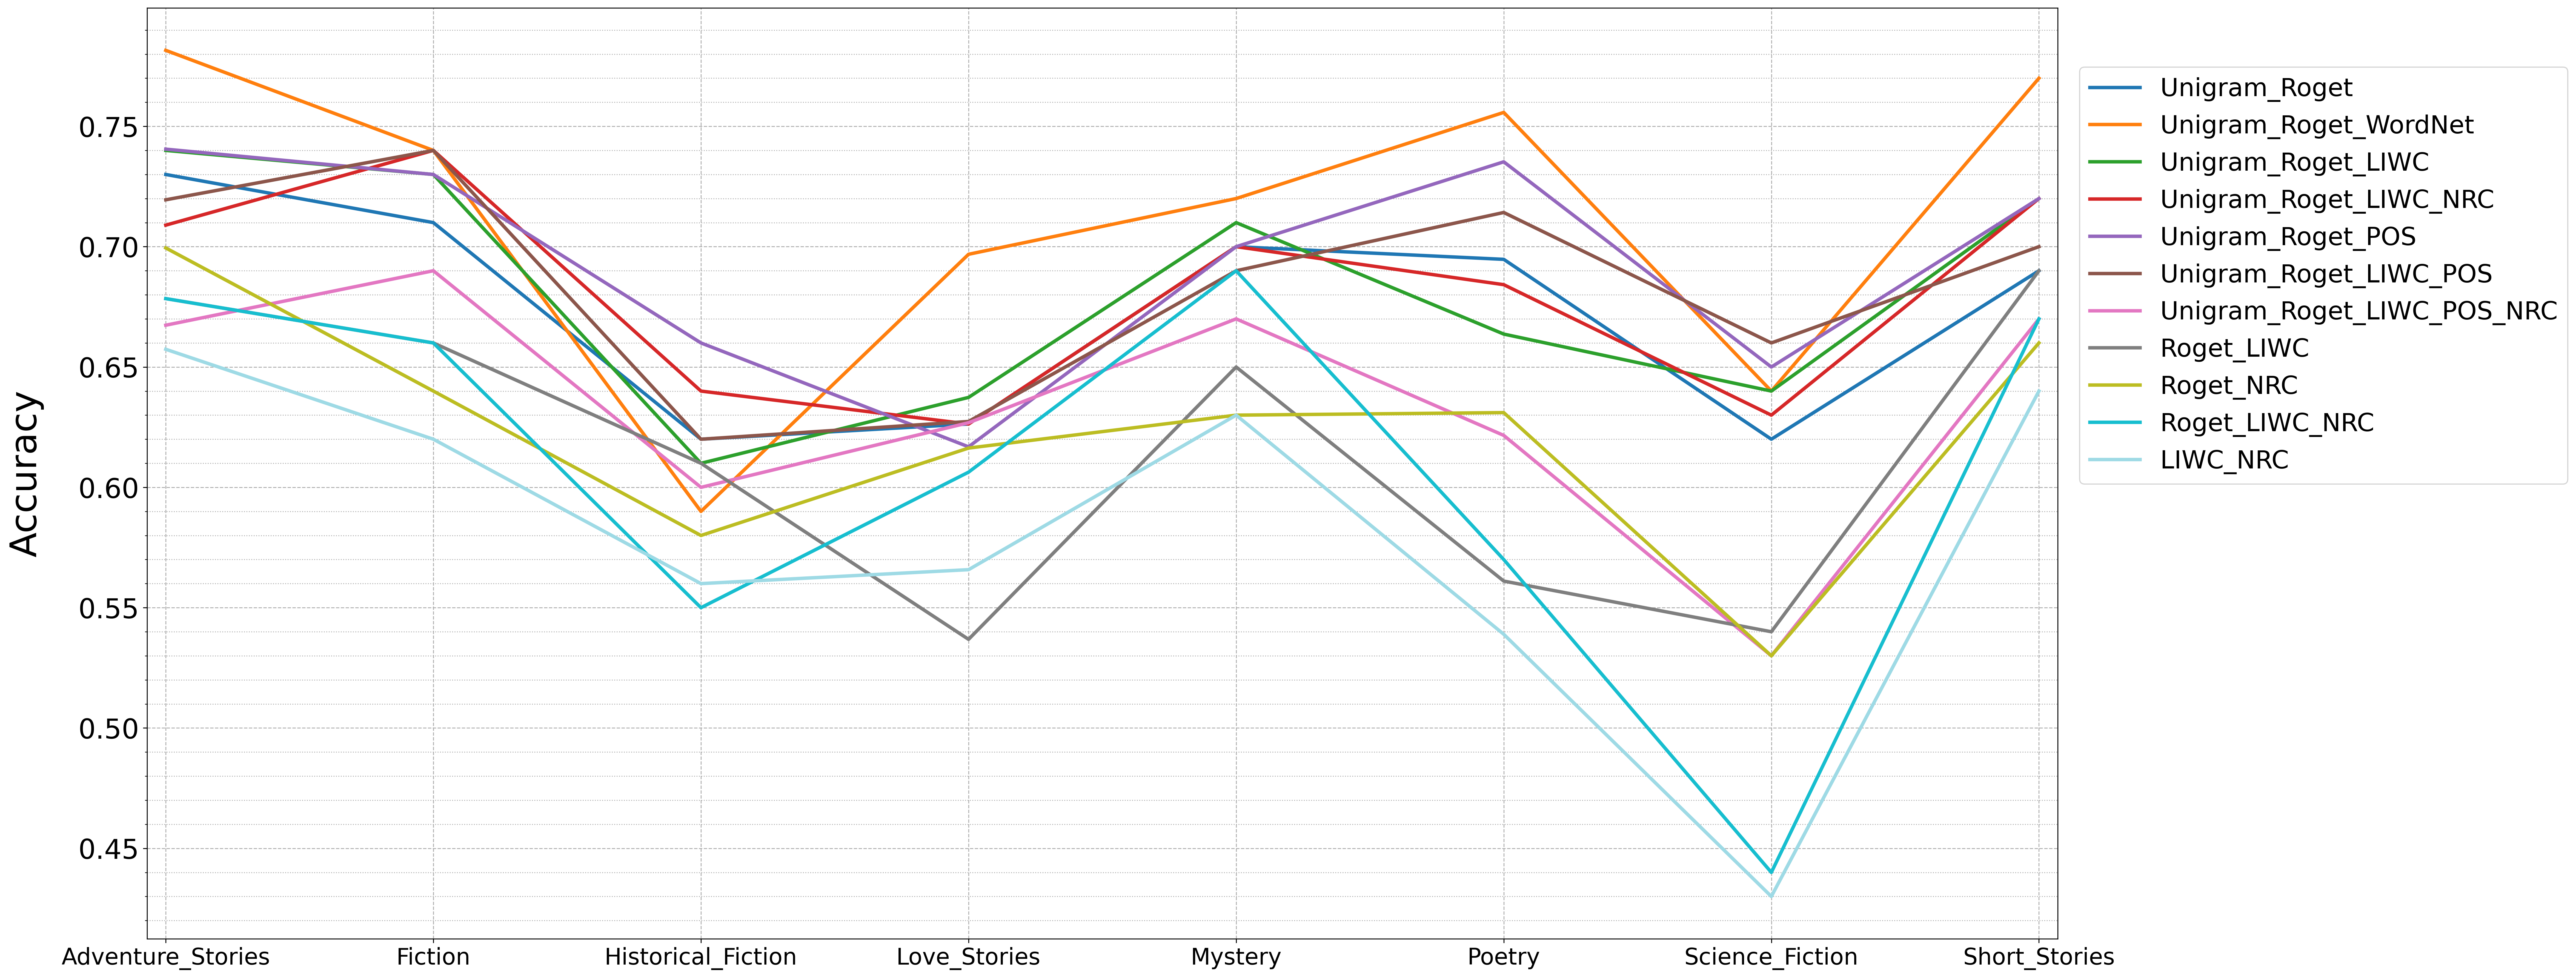

In [20]:
plt.rcParams['figure.dpi'] = 300
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(30,15))

model_names = [acc["Model Name"].unique()[0] for acc in ens_accs]
all_acc_colors = create_cmap(plt.cm.tab20, model_names)

for accuracies in ens_accs:
    accuracies[accuracies["Genre"] != "Average"].plot(x="Genre", y="Accuracy", ax=axes, rot=0, 
                                                     color=all_acc_colors[accuracies["Model Name"].unique()[0]],
                                                     linewidth=3, label=accuracies["Model Name"].unique()[0])

setup_axis(axes, x_ticklabels=NEW_GENRES, ylabel="Accuracy", minor_grid=":")

axes.legend(model_names, bbox_to_anchor=(1.005, 0.95), loc="upper left", fontsize=22)
plt.margins(x=0.01, y=0.05)
plt.show()